In [81]:
# !pip install yfinance
#!pip install selenium

In [15]:
import yfinance as yf

###### Question 1 - Extracting Tesla Stock Data Using yfinance

In [17]:
tesla = yf.Ticker("TSLA")

tesla_stock_data = tesla.history(period="1y") 
print(tesla_stock_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-11 00:00:00-04:00  264.269989  274.850006  260.609985  273.579987   
2023-09-12 00:00:00-04:00  270.760010  278.390015  266.600006  267.480011   
2023-09-13 00:00:00-04:00  270.070007  274.980011  268.100006  271.299988   
2023-09-14 00:00:00-04:00  271.320007  276.709991  270.420013  276.040009   
2023-09-15 00:00:00-04:00  277.549988  278.980011  271.000000  274.390015   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-09-11 00:00:00-04:00  174667900        0.0           0.0  
2023-09-12 00:00:00-04:00  135999900        0.0           0.0  
2023-09-13 00:00:00-04:00  111673700        0.0           0.0  
2023-09-14 00:00:00-04:00  107709800        0.0           0.0  
2023-09-15 00:00:00-04:00  133422800        0.0           0.0  


###### Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

response = requests.get(url)


if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    

    table = soup.find('table')
    
    dates = []
    revenues = []
    
   
    for row in table.find_all('tr')[1:]:  
        cols = row.find_all('td')
        if len(cols) == 2:  
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')  
            dates.append(date)
            revenues.append(revenue)
  
    df = pd.DataFrame({
        'Date': dates,
        'Revenue (USD)': revenues
    })
    
  
    print(df)
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Empty DataFrame
Columns: [Date, Revenue (USD)]
Index: []


###### Question 3 - Extracting GameStop Stock Data Using yfinance 

In [3]:
import yfinance as yf


gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")  


gme_data.reset_index(inplace=True)


print(gme_data.head())

                       Date       Open       High        Low      Close  \
0 2023-09-11 00:00:00-04:00  17.850000  17.850000  16.900000  17.020000   
1 2023-09-12 00:00:00-04:00  17.530001  18.500000  17.190001  17.230000   
2 2023-09-13 00:00:00-04:00  17.309999  17.930000  17.270000  17.809999   
3 2023-09-14 00:00:00-04:00  17.799999  18.520000  17.600000  18.330000   
4 2023-09-15 00:00:00-04:00  18.360001  18.610001  18.150000  18.219999   

    Volume  Dividends  Stock Splits  
0  3543800        0.0           0.0  
1  5179400        0.0           0.0  
2  3012600        0.0           0.0  
3  3078000        0.0           0.0  
4  6158000        0.0           0.0  


###### Question 4 - Extracting GameStop Revenue Data Using Webscraping -

In [108]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


response = requests.get(url)

if response.status_code == 200:
   
    soup = BeautifulSoup(response.content, 'html.parser')
    
   
    table = soup.find('table', {'class': 'historical_data_table'})
    
   
    dates = []
    revenues = []
    
  
    for row in table.find_all('tr')[1:]:  
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')  
            dates.append(date)
            revenues.append(revenue)
    
 
    df = pd.DataFrame({
        'Date': dates,
        'Revenue (USD)': revenues
    })
    

    df['Revenue (USD)'] = pd.to_numeric(df['Revenue (USD)'], errors='coerce')
    

    print(df)
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Failed to retrieve the webpage. Status code: 403


###### Question 5 - Tesla Stock and Revenue Dashboard 

In [11]:
import matplotlib.pyplot as plt


dates = [x[0] for x in tesla_revenue]
revenues = [float(x[1].replace("$", "").replace(",", "")) for x in tesla_revenue]


fig, ax1 = plt.subplots()


ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(tesla_stock_data.index, tesla_stock_data['Close'], color='tab:blue')


ax2 = ax1.twinx()
ax2.set_ylabel('Revenue (in billions)', color='tab:red')
ax2.plot(dates, revenues, color='tab:red')

plt.title('Tesla Stock Price vs Revenue')
plt.show()

NameError: name 'tesla_revenue' is not defined

###### Question 6 - GameStop Stock and Revenue Dashboard

In [124]:
import yfinance as yf
import pandas as pd


gamestop = yf.Ticker("GME")
gme_stock_data = gamestop.history(period="1y")  


# gme_stock_data.head()


In [112]:
import requests
from bs4 import BeautifulSoup


url = "https://finance.yahoo.com/quote/GME/financials"


response = requests.get(url)


soup = BeautifulSoup(response.text, "html.parser")


revenue_data = []
for row in soup.find_all('div', class_='D(tbr)'):
    cols = row.find_all('div')
    cols = [ele.text.strip() for ele in cols]
    revenue_data.append([ele for ele in cols if ele])  


gme_revenue_df = pd.DataFrame(revenue_data)


gme_revenue_df.head()


""


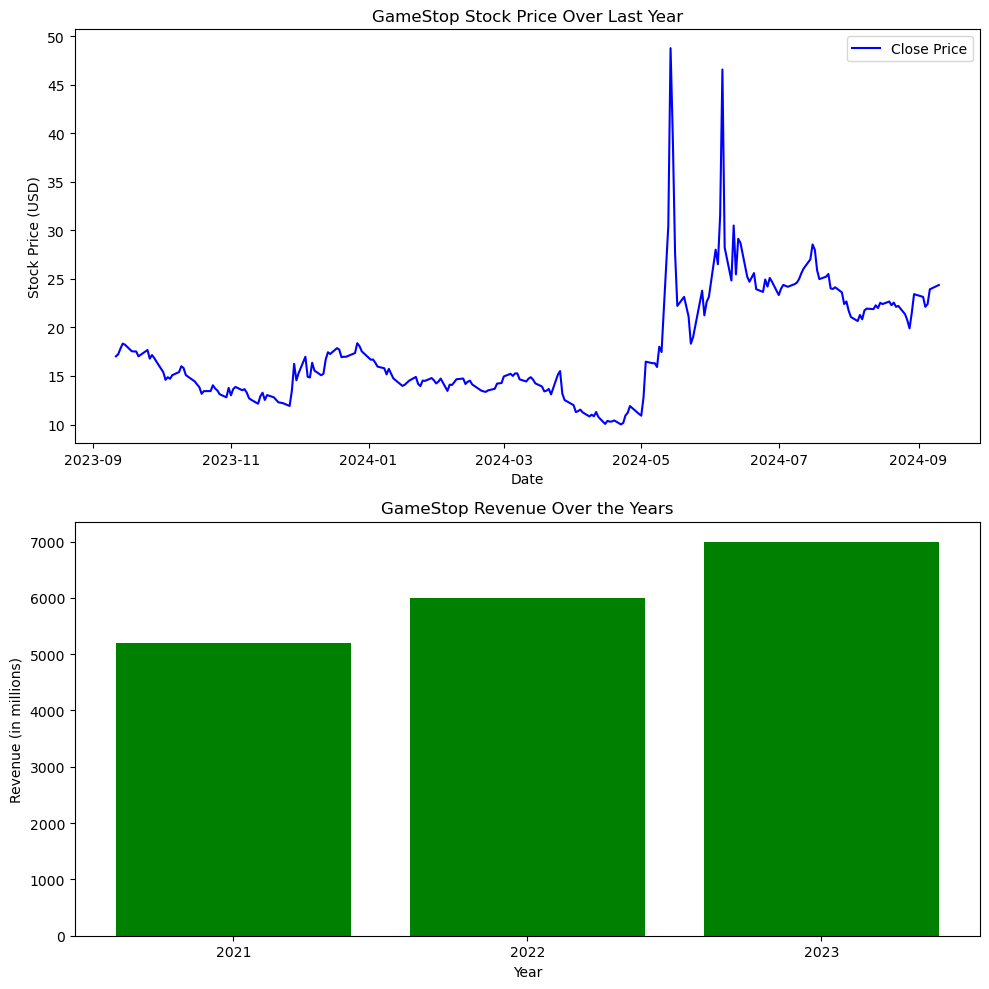

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))


ax1.plot(gme_stock_data.index, gme_stock_data['Close'], label='Close Price', color='blue')
ax1.set_title('GameStop Stock Price Over Last Year')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)')
ax1.legend()


ax2.bar(revenue_dates, revenue_values, color='green')
ax2.set_title('GameStop Revenue Over the Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (in millions)')

plt.tight_layout()
plt.show()
